In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# 한글화
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams['axes.unicode_minus'] = False # 한글화에서 - 부호 처리

Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [54]:
df = pd.read_csv('/content/drive/MyDrive/간이프로젝트/12월3일/20231203_지역나무데이터.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          204 non-null    int64  
 1   지역                  204 non-null    object 
 2   연평균 미세먼지(PM-10)     204 non-null    int64  
 3   낮시간 소음도             204 non-null    int64  
 4   국토면적                204 non-null    int64  
 5   산림면적                204 non-null    int64  
 6   임목축적                204 non-null    int64  
 7   산림율                 204 non-null    float64
 8   평균 임목축적             204 non-null    float64
 9   2019년 가로수 조성 현황(종)  204 non-null    object 
 10  자치단체명               204 non-null    object 
 11  세입총계                204 non-null    int64  
 12  해면기압 10년 평균(hPa)    204 non-null    float64
 13  평균기온 10년 평균(℃)      204 non-null    float64
 14  최고기온 10년 평균(℃)      204 non-null    float64
 15  최저기온 10년 평균(℃)      204 non-null    float64
 16  강수량 10년 

In [53]:
df

,연평균 미세먼지(PM-10),낮시간 소음도,산림율,평균 임목축적,세입총계,해면기압 10년 평균(hPa),평균기온 10년 평균(℃),최고기온 10년 평균(℃),최저기온 10년 평균(℃),강수량 10년 평균(㎜),상대습도 10년 평균(%),일조시간 10년 평균(시간),나무종류,나무수량
0,9121111,69,25.32,148.97,52387838215000,1016.4,13.0,17.8,9.0,1274.2,59.3,2440.4,벚나무,26425.438503
1,9121111,69,25.32,148.97,52387838215000,1016.4,13.0,17.8,9.0,1274.2,59.3,2440.4,왕벚나무,32641.000000
2,9121111,69,25.32,148.97,52387838215000,1016.4,13.0,17.8,9.0,1274.2,59.3,2440.4,은행나무,109784.000000
3,9121111,69,25.32,148.97,52387838215000,1016.4,13.0,17.8,9.0,1274.2,59.3,2440.4,메타세쿼이어,5316.000000
4,9121111,69,25.32,148.97,52387838215000,1016.4,13.0,17.8,9.0,1274.2,59.3,2440.4,양버즘나무,64007.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2739143,33,47.20,149.53,8070231073000,1016.5,16.5,19.6,13.8,1520.7,70.2,1842.7,백합나무,108.000000
200,2739143,33,47.20,149.53,8070231073000,1016.5,16.5,19.6,13.8,1520.7,70.2,1842.7,배롱나무,2808.000000
201,2739143,33,47.20,149.53,8070231073000,1016.5,16.5,19.6,13.8,1520.7,70.2,1842.7,이팝나무,615.000000
202,2739143,33,47.20,149.53,8070231073000,1016.5,16.5,19.6,13.8,1520.7,70.2,1842.7,곰솔,4375.000000


In [56]:
df.isnull().sum()

Unnamed: 0             0
지역                     0
연평균 미세먼지(PM-10)        0
낮시간 소음도                0
국토면적                   0
산림면적                   0
임목축적                   0
산림율                    0
평균 임목축적                0
2019년 가로수 조성 현황(종)     0
자치단체명                  0
세입총계                   0
해면기압 10년 평균(hPa)       0
평균기온 10년 평균(℃)         0
최고기온 10년 평균(℃)         0
최저기온 10년 평균(℃)         0
강수량 10년 평균(㎜)          0
상대습도 10년 평균(%)         0
일조시간 10년 평균(시간)        0
나무종류                   0
나무수량                  17
dtype: int64

In [57]:
df.fillna(0, inplace=True)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [59]:
#불필요한 데이터, 수치형 데이터 , 범주형데이터, 종속변수
#  0   지역                  204 non-null    object
#  1   연평균 미세먼지(PM-10)     204 non-null    int64
#  2   낮시간 소음도             204 non-null    int64
#  3   국토면적                204 non-null    object
#  4   산림면적                204 non-null    object
#  5   임목축적                204 non-null    object
#  6   산림율                 204 non-null    float64
#  7   평균 임목축적             204 non-null    float64
#  8   2019년 가로수 조성 현황(종)  204 non-null    object
#  9   자치단체명               204 non-null    object
#  10  세입총계                204 non-null    object
#  11  해면기압 10년 평균(hPa)    204 non-null    float64
#  12  평균기온 10년 평균(℃)      204 non-null    float64
#  13  최고기온 10년 평균(℃)      204 non-null    float64
#  14  최저기온 10년 평균(℃)      204 non-null    float64
#  15  강수량 10년 평균(㎜)       204 non-null    float64
#  16  상대습도 10년 평균(%)      204 non-null    float64
#  17  일조시간 10년 평균(시간)     204 non-null    float64
#  18  나무종류                204 non-null    object
#  19  나무수량                204 non-null    object
# 명확하게 분류
COL_DEL = ['2019년 가로수 조성 현황(종)','자치단체명','국토면적','산림면적','임목축적']
COL_NUM = ['연평균 미세먼지(PM-10)','낮시간 소음도 ','산림율','평균 임목축적','세입총계','해면기압 10년 평균(hPa)','평균기온 10년 평균(℃)','최고기온 10년 평균(℃)','최저기온 10년 평균(℃)','강수량 10년 평균(㎜)','상대습도 10년 평균(%)','일조시간 10년 평균(시간)']
COL_CAT = ['지역','나무종류']
COL_Y = ['나무수량']

In [60]:
# y = ax + b
# 독립변수가 먼저옴
from sklearn.model_selection import train_test_split
# 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(df[COL_NUM + COL_CAT], df[COL_Y], test_size=0.3, random_state=42)


In [61]:
# 정규화
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[COL_NUM] = scaler.fit_transform(X_train[COL_NUM])
X_test_scaled[COL_NUM] = scaler.transform(X_test[COL_NUM])


In [62]:
# 범주화
for col in COL_CAT:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], X_test[col]])) # 모든 범주를 확인
    X_train_scaled[col] = le.transform(X_train[col]) # train 데이터 변환
    X_test_scaled[col] = le.transform(X_test[col]) # test 데이터 변환


In [63]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 초기화하고 레이블에 적용
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# X_train_scaled의 각 열의 데이터 유형 확인
print(y_train_encoded.dtype)


int64


In [65]:
y_train_encoded

array([126,  31,   6,  11, 114,  62,  46,   0,  39,  63, 107, 112,  16,
        65,  23, 105,  59,  69,  60, 120,   0,  48,  76, 124,  66,  71,
        45,  74,  91,  38, 122,   0,  82,  28,   0,  35,  20,  32,  15,
       108,  50,  26,  55,  54,  73,   0,  85,  75,  37,  42,   0,  83,
        98,   2,  27,  64,   1,  12,  89,  77, 110,  72, 103,  57,  88,
        87,   0,  19,  61,  68,  70,  51,  13,   0, 117,  52, 104,  47,
       119,   0, 113,  80,  56, 101,  29,  36,   0,  18, 115,   4,  84,
       125,  79,  10,  33, 102,   5,  22,  81,   7,   0,  40, 109, 118,
        30,  49,  44, 100,  99,  34, 116,   8,  21,  17,  67,  78,  24,
         0,  97,  90, 123,   0,  93,  43, 106,   0,   3,  58,  94,  41,
        14,  86,  92,   0,   0, 111,  53,  25,  96,   9, 121,  95])

In [66]:
X_train_scaled

,연평균 미세먼지(PM-10),낮시간 소음도,산림율,평균 임목축적,세입총계,해면기압 10년 평균(hPa),평균기온 10년 평균(℃),최고기온 10년 평균(℃),최저기온 10년 평균(℃),강수량 10년 평균(㎜),상대습도 10년 평균(%),일조시간 10년 평균(시간),지역,나무종류
98,2.901542,-0.162283,-0.200381,-0.114780,1.821574,0.577282,-0.853446,-0.456548,-0.868865,0.090970,0.345112,0.352490,21,9
31,-0.810668,0.573169,0.125857,1.367879,-0.248562,0.577282,0.990739,1.438478,0.446857,-1.195076,-1.646741,0.569676,65,5
12,-0.280392,0.450594,-0.555748,1.272308,0.144058,-1.642899,1.254194,0.740310,1.343940,2.327573,-0.745665,1.343055,90,6
35,-0.810668,0.573169,0.125857,1.367879,-0.248562,0.577282,0.990739,1.438478,0.446857,-1.195076,-1.646741,0.569676,63,3
120,-0.042935,0.450594,0.942910,-0.008081,-0.550407,0.823968,-1.468174,-0.456548,-1.765948,-0.790391,-0.239797,-0.478722,198,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2.901542,-0.162283,-0.200381,-0.114780,1.821574,0.577282,-0.853446,-0.456548,-0.868865,0.090970,0.345112,0.352490,12,0
14,-0.280392,0.450594,-0.555748,1.272308,0.144058,-1.642899,1.254194,0.740310,1.343940,2.327573,-0.745665,1.343055,93,9
92,-1.133568,0.205443,0.034103,-0.360253,-0.960921,0.601950,-0.414354,0.840048,-0.689448,-0.730981,0.487387,-0.829419,112,4
179,1.359459,-0.284858,1.244389,0.726375,-0.114369,-0.656152,-0.326536,0.939787,-0.988476,-1.117494,-0.050097,-0.541478,39,3


In [67]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# 결측값을 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled_imputed, y_train_encoded)


RandomForestClassifier(random_state=42)

In [68]:
from sklearn.impute import SimpleImputer
# 모델을 사용하여 예측
y_pred = model.predict(X_test_scaled_imputed)

In [69]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.0


In [70]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score

# # 데이터 불러오기
# df = pd.read_csv('/content/drive/MyDrive/간이프로젝트/12월3일/20231203_지역나무데이터.csv')

# # 불필요한 열 제거 (Unnamed: 0, 자치단체명, 2019년 가로수 조성 현황(종), 지역)
# df = df.drop(columns=['Unnamed: 0', '자치단체명', '2019년 가로수 조성 현황(종)', '지역','국토면적','산림면적','임목축적'])

# # 결측치 처리 - 나무수량 열
# imputer = SimpleImputer(strategy='mean')
# df['나무수량'] = imputer.fit_transform(df[['나무수량']])

# # 데이터 분할
# X = df.drop(columns=['나무종류'])  # 독립 변수
# y = df['나무종류']  # 종속 변수
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 정규화
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 범주형 데이터 인코딩
# encoder = LabelEncoder()
# X_train_encoded = X_train.copy()
# X_test_encoded = X_test.copy()
# for col in X_train.select_dtypes(include='object').columns:
#     X_train_encoded[col] = encoder.fit_transform(X_train[col])
#     X_test_encoded[col] = encoder.transform(X_test[col])

# # 모델 훈련
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_encoded, y_train)

# # 모델 평가
# y_pred = model.predict(X_test_encoded)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")


Accuracy: 0.0


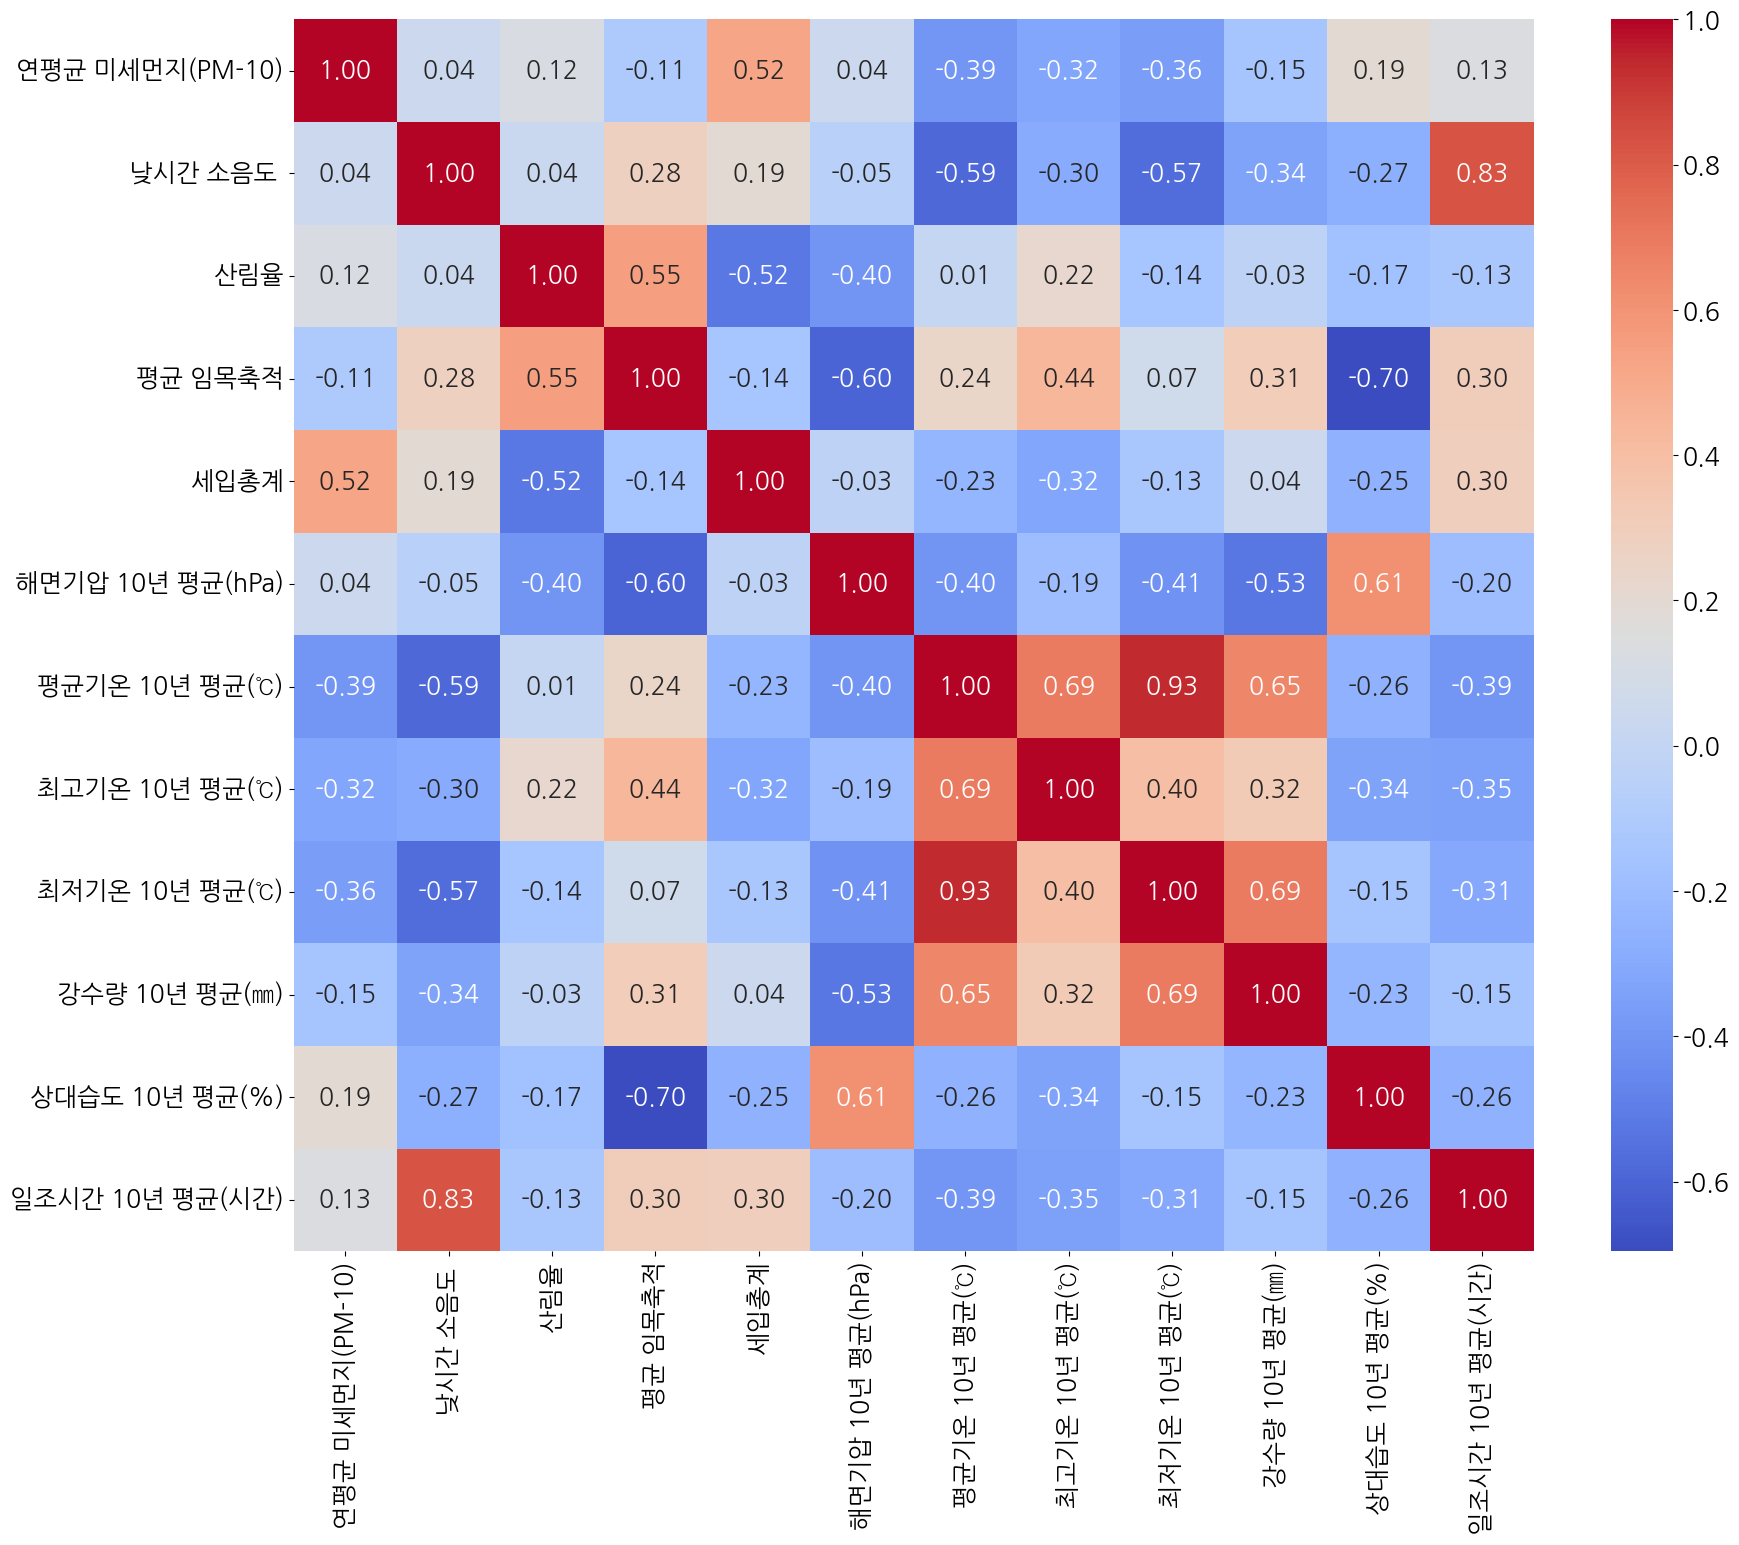

In [71]:
correlation_matrix = df[COL_NUM].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [72]:
from sklearn.decomposition import PCA

# 주성분 개수 지정
n_components = 2  # 2개의 주성분을 유지하려면 값을 조정하세요.

# PCA 모델 생성
pca = PCA(n_components=n_components)

# 데이터 피팅 및 변환
X_train_pca = pca.fit_transform(X_train_encoded)  # X_train_encoded는 이미 범주형 변수를 인코딩한 데이터입니다.

# PCA로 변환된 데이터를 새로운 DataFrame으로 만들어 시각화 또는 모델에 사용
pca_df = pd.DataFrame(data=X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# 주성분의 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("설명된 분산 비율:", explained_variance_ratio)

# 주성분 간의 상관 관계 확인 (선택 사항)
pca_components_corr = pca_df.corr()
print("주성분 간의 상관 관계:\n", pca_components_corr)


설명된 분산 비율: [1.00000000e+00 2.03919443e-13]
주성분 간의 상관 관계:
               PC1           PC2
PC1  1.000000e+00  3.099729e-17
PC2  3.099729e-17  1.000000e+00


In [81]:
# pca_df의 행 수를 df와 동일하게 맞추기
pca_df = pca_df.iloc[:df.shape[0], :]

# 이후 코드는 이전 코드와 동일하게 진행


In [82]:
pca_df.shape

(142, 2)

In [80]:
df.shape

(204, 14)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# PC1만 선택
X = pca_df[['PC1']]
y = df[COL_Y]  # 목표 변수

# 데이터프레임 X의 행 수를 목표 변수 y의 행 수에 맞춤
X = X.iloc[:len(y), :]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

# 모델 결과 및 PC1의 계수 확인
print("모델 계수 (Coefficient):", model.coef_)



ValueError: ignored